<a href="https://colab.research.google.com/github/sdw1621/tensorflow_hangi_uni/blob/main/fashion_minist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Fashion MNIST CNN 모델

# Reference : tensorflow.org

import tensorflow as tf
from tensorflow import keras

print('TensorFlow version: {}'.format(tf.__version__))

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# scale the values to 0.0 to 1.0
train_images = train_images / 255.0
test_images = test_images / 255.0

# reshape for feeding into the model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('\ntrain_images.shape: {}, of {}'.format(train_images.shape, train_images.dtype))
print('test_images.shape: {}, of {}'.format(test_images.shape, test_images.dtype))


TensorFlow version: 2.6.0
4431872/4422102 [==============================] - 0s 0us/step

train_images.shape: (60000, 28, 28, 1), of float64
test_images.shape: (10000, 28, 28, 1), of float64


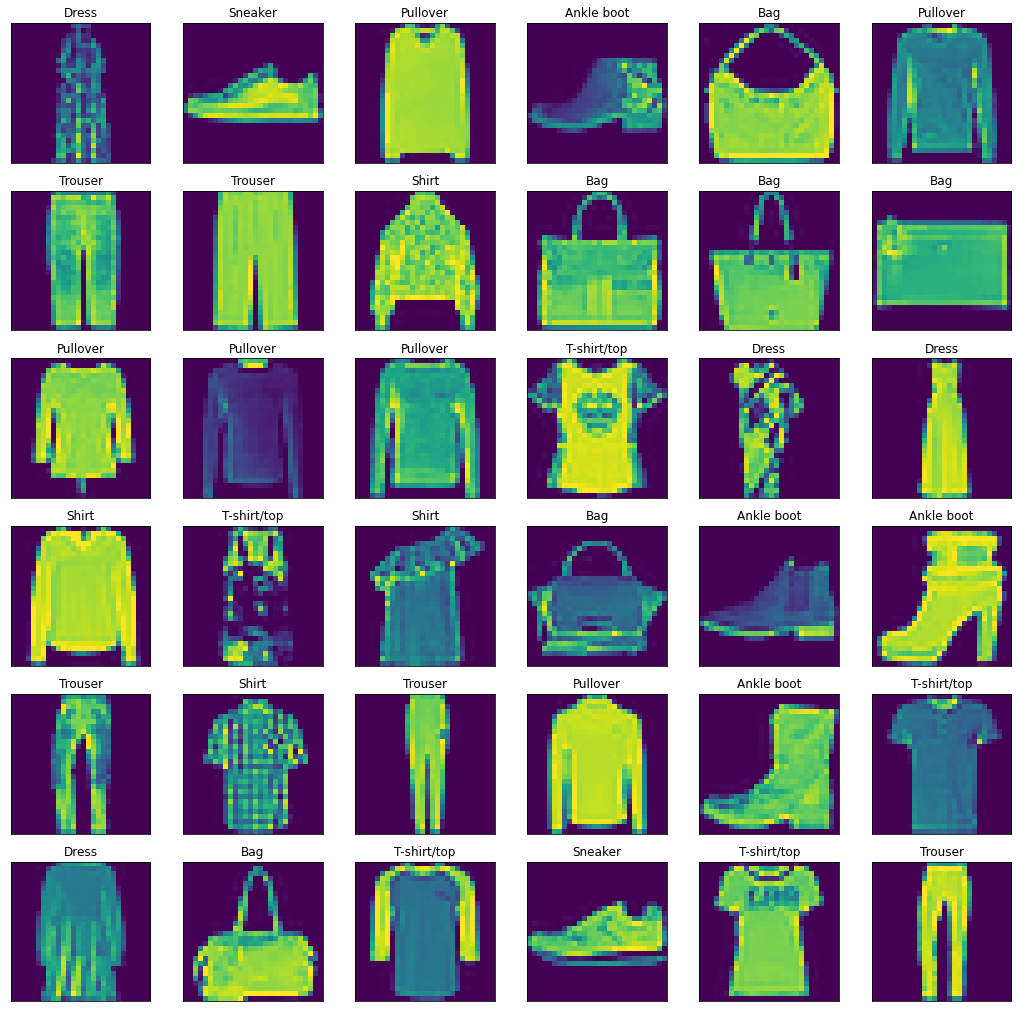

In [ ]:
# FASHION MINST 보기
import numpy as np
import matplotlib.pyplot as plt

# plot 18" x 18" 
fig = plt.figure(figsize=(18, 18))
for idx in range(36):
    id = np.random.randint(60000)
    number = fig.add_subplot(6, 6, idx+1, xticks=[], yticks=[])
    number.imshow(np.squeeze(train_images[id]))#, cmap='gray')
    number.set_title(class_names[train_labels[id]])


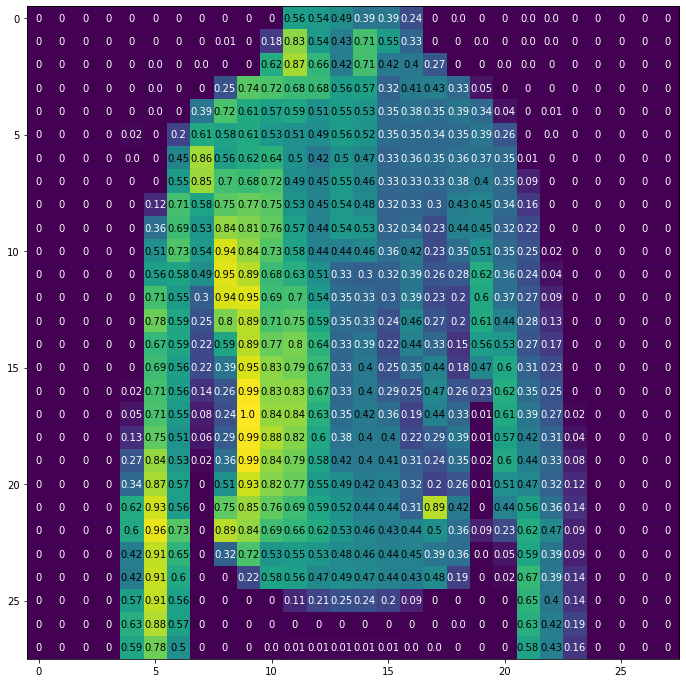

In [ ]:
# 이미지 데이터 상세
img = np.squeeze(train_images[3143])

fig = plt.figure(figsize = (12,12)) 
big_number = fig.add_subplot(111)
big_number.imshow(img) #, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        big_number.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')
        

In [ ]:
# 모델 설계하기
model = keras.Sequential([
  keras.layers.Conv2D( filters=32, input_shape=(28,28,1), kernel_size=(3,3), 
                      activation='relu', name='Conv1'),
  keras.layers.MaxPooling2D(pool_size=(2,2)),
  keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2,2)),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation=tf.nn.softmax, name='Softmax')
])

# 모델 프로파일
model.summary()

# 학습 모델 확정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
Softmax (Dense)              (None, 10)                8010      
Total params: 17,578
Trainable params: 17,578
Non-trainable params: 0
__________________________________________________

In [ ]:

# 학습 반복회수 설정
epochs = 5

# batch size 결정
num_batch = 128

# 학습 모델 학습

model.fit(train_images, train_labels, epochs=epochs, batch_size = num_batch)



Epoch 1/5
469/469 [==============================] - 34s 73ms/step - loss: 0.2281 - accuracy: 0.9182
Epoch 2/5
469/469 [==============================] - 34s 73ms/step - loss: 0.2222 - accuracy: 0.9199
Epoch 3/5
469/469 [==============================] - 34s 73ms/step - loss: 0.2172 - accuracy: 0.9227
Epoch 4/5
469/469 [==============================] - 34s 74ms/step - loss: 0.2143 - accuracy: 0.9226
Epoch 5/5
469/469 [==============================] - 34s 73ms/step - loss: 0.2093 - accuracy: 0.9245


In [ ]:
# 학습모델 검증하기

score = model.evaluate(test_images, test_labels, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

313/313 [==============================] - 2s 7ms/step - loss: 0.2689 - accuracy: 0.9043
Test loss: 0.2688841223716736 / Test accuracy: 0.9042999744415283


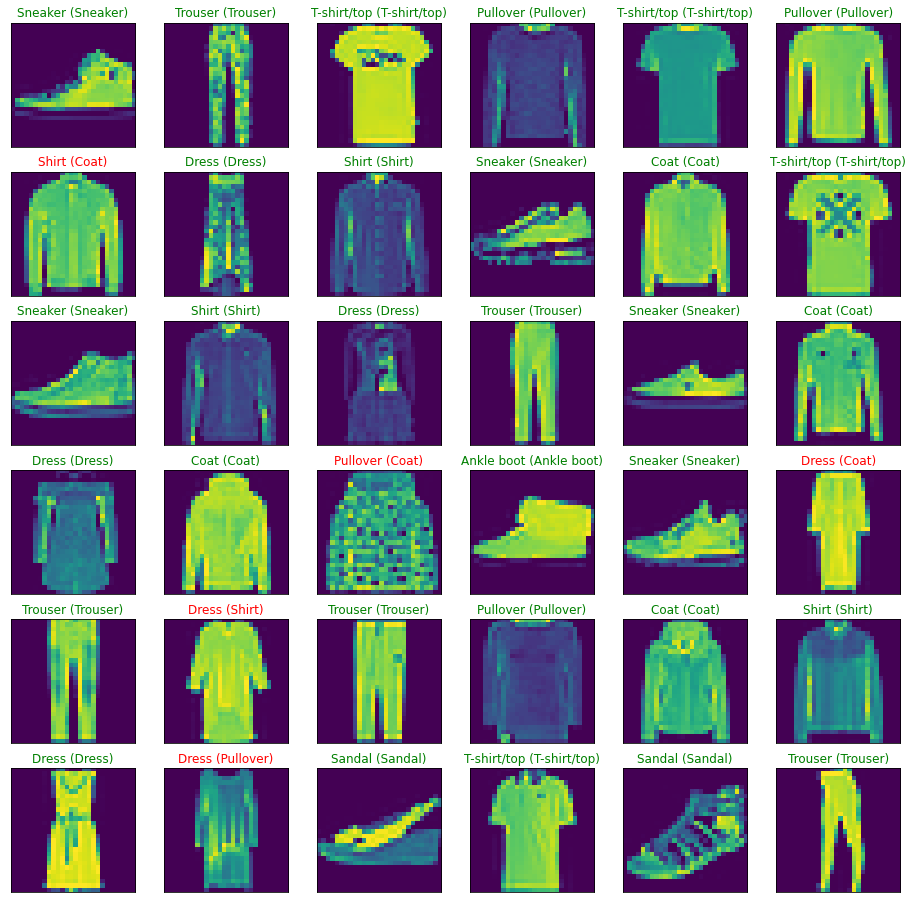

In [ ]:

# 예측 결과 확인해 보기

fig = plt.figure(figsize=(16, 16))
for idx in np.arange(36):
    id = np.random.randint(10000)
    image = np.expand_dims(test_images[id], axis=0)
    preds = np.argmax(model.predict(image))
    ax = fig.add_subplot(6, 6, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(image)) #, cmap='gray')
    ax.set_title("{} ({})".format(class_names[preds], class_names[test_labels[id]]),
                 color=("green" if preds == test_labels[id] else "red"))

In [ ]:

# 학습모델 서빙 모델로 저장
import os

SAVED_MODEL_PATH = './saved_model'
MODEL_DIR = SAVED_MODEL_PATH

version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
  model,
  export_path,
  overwrite=True,
  include_optimizer=True,
  save_format=None,
  signatures=None,
  options=None
)
print('\nSaved model:')

export_path = ./saved_model/1



INFO:tensorflow:Assets written to: ./saved_model/1/assets


INFO:tensorflow:Assets written to: ./saved_model/1/assets



Saved model:
